In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [10]:
data=pd.read_csv('imbalancedFinal.csv')


In [11]:
filtered_data5 = data[data['Road user'] == 4]
filtered_data5.shape

(6086, 15)

In [12]:
num_bins = 2

bed_days_min = filtered_data5['Severity'].min()
bed_days_max = filtered_data5['Severity'].max()

bin_width = (bed_days_max - bed_days_min) / num_bins
bins = [bed_days_min + i * bin_width for i in range(num_bins + 1)]

def bin_function(x):
    for i in range(1, len(bins)):
        if x <= bins[i]:
            return i - 1
    return i

filtered_data5['Bed_days_category'] = filtered_data5['Severity'].apply(bin_function)

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_3369/2563099148.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data5['Bed_days_category'] = filtered_data5['Severity'].apply(bin_function)


In [13]:
filtered_data5['Bed_days_category'].value_counts()


Bed_days_category
0    5944
1     142
Name: count, dtype: int64

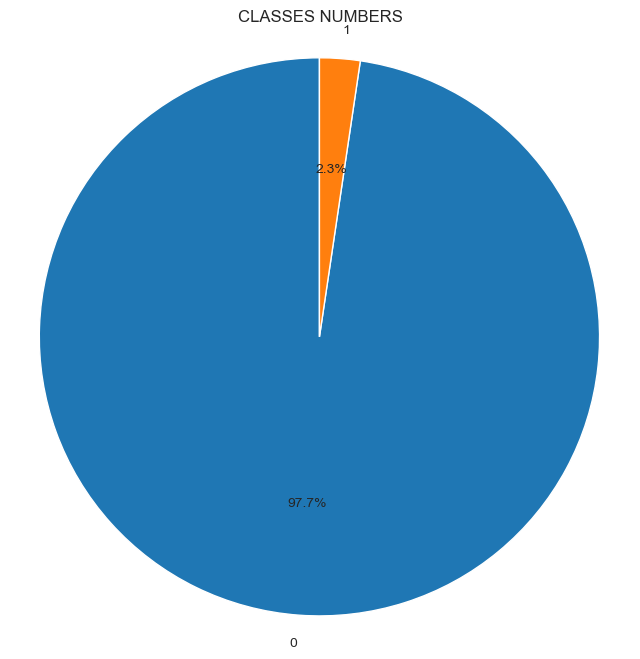

In [14]:
import matplotlib.pyplot as plt

value_counts = filtered_data5['Bed_days_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('CLASSES NUMBERS')
plt.show()

In [15]:
from xgboost import XGBClassifier


X = filtered_data5[['Calendar year','Month','Cause of injury','Age group','Sex','Counterparty','ABS remoteness area','Road user']]


y = filtered_data5['Bed_days_category']



X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state=42)

xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

precision_xgb = precision_score(y_test, y_pred_xgb) 
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print('Accuracy:', acc_xgb)
print('Confusion Matrix:\n', conf_matrix_xgb)
print('Classification Report:\n', class_report_xgb)
print('Precision:', precision_xgb)
print('Recall:', recall_xgb)
print('F1-score:', f1_xgb)

Accuracy: 0.9720700985761227
Confusion Matrix:
 [[1763   24]
 [  27   12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1787
           1       0.33      0.31      0.32        39

    accuracy                           0.97      1826
   macro avg       0.66      0.65      0.65      1826
weighted avg       0.97      0.97      0.97      1826

Precision: 0.3333333333333333
Recall: 0.3076923076923077
F1-score: 0.32


In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import numpy as np
from xgboost import XGBClassifier
from imblearn.combine import SMOTEENN


# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Loop through the StratifiedKFold splits
for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTE to the training data
  
    # Train the XGBoost classifier
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_xgb = xgb_model.predict(X_test)
    
    # Calculate and store metrics
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {fold}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[591   4]
 [ 13   1]]
Confusion Matrix for Fold 2:
 [[587   8]
 [ 11   3]]
Confusion Matrix for Fold 3:
 [[588   7]
 [  7   7]]
Confusion Matrix for Fold 4:
 [[590   5]
 [  9   5]]
Confusion Matrix for Fold 5:
 [[588   6]
 [  8   7]]
Confusion Matrix for Fold 6:
 [[593   1]
 [ 13   2]]
Confusion Matrix for Fold 7:
 [[588   6]
 [  9   5]]
Confusion Matrix for Fold 8:
 [[589   5]
 [ 12   2]]
Confusion Matrix for Fold 9:
 [[589   5]
 [  6   8]]
Confusion Matrix for Fold 10:
 [[587   7]
 [  8   6]]
Mean Accuracy: 0.9753537939676779
Accuracy Std Dev: 0.0034431317359411213
Mean Precision: 0.4495038295038295
Precision Std Dev: 0.14428745974287183
Mean Recall: 0.32428571428571423
Recall Std Dev: 0.16452294810607648
Mean F1-score: 0.3611665274296853
F1-score Std Dev: 0.15239408726907783
Mean Confusion Matrix:
 [[589.    5.4]
 [  9.6   4.6]]


In [8]:
model =DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)



acc = accuracy_score(y_test, pred)
conf = confusion_matrix(y_test, pred)
class_report = classification_report(y_test, pred)

precision = precision_score(y_test, pred) 
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print('Accuracy:', acc)
print('Confusion Matrix:\n', conf)
print('Classification Report:\n', class_report)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.963855421686747
Confusion Matrix:
 [[1752   35]
 [  31    8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1787
           1       0.19      0.21      0.20        39

    accuracy                           0.96      1826
   macro avg       0.58      0.59      0.59      1826
weighted avg       0.97      0.96      0.96      1826

Precision: 0.18604651162790697
Recall: 0.20512820512820512
F1-score: 0.1951219512195122


In [9]:
model = SVC(random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

acc = accuracy_score(y_test, pred)
conf = confusion_matrix(y_test, pred)
class_report = classification_report(y_test, pred)

precision = precision_score(y_test, pred) 
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print('Accuracy:', acc)
print('Confusion Matrix:\n', conf)
print('Classification Report:\n', class_report)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.9786418400876232
Confusion Matrix:
 [[1787    0]
 [  39    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1787
           1       0.00      0.00      0.00        39

    accuracy                           0.98      1826
   macro avg       0.49      0.50      0.49      1826
weighted avg       0.96      0.98      0.97      1826

Precision: 0.0
Recall: 0.0
F1-score: 0.0


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amin/opt/anacon

In [10]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', random_state=42)

# آموزش مدل با داده‌های آموزشی
mlp_model.fit(X_train
              , y_train)

# Evaluate the model
y_pred_mlp = mlp_model.predict(X_test)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
class_report_mlp = classification_report(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)

print('Accuracy:', acc_mlp)
print('Confusion Matrix:\n', conf_matrix_mlp)
print('Classification Report:\n', class_report_mlp)
print('Precision:', precision_mlp)
print('Recall:', recall_mlp)
print('F1-score:', f1_mlp)

Accuracy: 0.9786418400876232
Confusion Matrix:
 [[1787    0]
 [  39    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1787
           1       0.00      0.00      0.00        39

    accuracy                           0.98      1826
   macro avg       0.49      0.50      0.49      1826
weighted avg       0.96      0.98      0.97      1826

Precision: 0.0
Recall: 0.0
F1-score: 0.0


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amin/opt/anacon

In [11]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate the model
y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print('Accuracy:', acc_lr)
print('Confusion Matrix:\n', conf_matrix_lr)
print('Classification Report:\n', class_report_lr)
print('Precision:', precision_lr)
print('Recall:', recall_lr)
print('F1-score:', f1_lr)

Accuracy: 0.9786418400876232
Confusion Matrix:
 [[1787    0]
 [  39    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1787
           1       0.00      0.00      0.00        39

    accuracy                           0.98      1826
   macro avg       0.49      0.50      0.49      1826
weighted avg       0.96      0.98      0.97      1826

Precision: 0.0
Recall: 0.0
F1-score: 0.0


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amin/opt/anacon